## Half Term Examination

### Question 1: Python Fundamentals

In [1]:

# a ) Control Structures


def fizz_buzz(n):
    for i in range(1, n+1):
        if i % 3 == 0 and i % 5 == 0:
            print("fizzbuzz")
        elif i % 3 == 0:
            print("fizz")
        elif i % 5 == 0:
            print("buzz")
        else:
            print(i)
fizz_buzz(15)

1
2
fizz
4
buzz
fizz
7
8
fizz
buzz
11
fizz
13
14
fizzbuzz


In [2]:
# b) Functions and Scope

def example_function():
    x = 10 
    print("in insite of the function:", x)
example_function()

in insite of the function: 10


### Question 2: Data Structures in Python

In [3]:
# a) Advanced List Manipulation
number_list = [3, 6, 2, 7, 5, 6, 8, 5, 8, 3, 7]
def remo_dupli(lst):
    uniq_nums = []  
    for num in lst:
        if num not in uniq_nums:
            uniq_nums.append(num)
    return uniq_nums

uniq_nums = remo_dupli(number_list)

In [4]:
def bubble_sort(lst):
    n = len(lst)
    for i in range(n - 1):
        for j in range(n - 1 - i):
            if lst[j] > lst[j + 1]:
                lst[j], lst[j + 1] = lst[j + 1], lst[j]  
    return lst

sort_nums = bubble_sort(uniq_nums)

In [5]:
def get_middle_3(lst):
    mid = len(lst) // 2
    return lst[mid - 1:mid + 2]

middle_3 = get_middle_3(sort_nums)

In [6]:
print("unique list:", uniq_nums)
print("sorted list:", sort_nums)
print("middle three element:", middle_3)

unique list: [2, 3, 5, 6, 7, 8]
sorted list: [2, 3, 5, 6, 7, 8]
middle three element: [5, 6, 7]


In [7]:
# (b) Dictionary Comprehensions
s = "Data Science"
ascii_map = {char: ord(char) for char in s}
print(ascii_map)

{'D': 68, 'a': 97, 't': 116, ' ': 32, 'S': 83, 'c': 99, 'i': 105, 'e': 101, 'n': 110}


### Question 3: NumPy Operations

In [8]:
import numpy as np

array_4x4 = np.arange(1, 17).reshape(4, 4)
print("4.4 array:")
print(array_4x4)

4.4 array:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [9]:
array_8x2 = array_4x4.reshape(8, 2)
print("reshape of 8.2 array:")
print(array_8x2)

reshape of 8.2 array:
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]]


In [10]:
transpose_4x4 = array_4x4.T

dot_product = np.dot(array_4x4, transpose_4x4)
print(" Using dot product of the 4x4 array with transpose:")
print(dot_product)

 Using dot product of the 4x4 array with transpose:
[[ 30  70 110 150]
 [ 70 174 278 382]
 [110 278 446 614]
 [150 382 614 846]]


In [11]:
# # b) Type Casting and Broadcasting

import numpy as np
a = np.array([1.5, 2.3, 3.7, 4.6])
a_int = a.astype(int)
print("array convert to inte:")
print(a_int)
b = np.array([[10], [20], [30], [40]])
result = b + a_int
print("\nafter broadcasting result:")
print(result)


array convert to inte:
[1 2 3 4]

after broadcasting result:
[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [41 42 43 44]]


### Question 4: Data Analysis with Pandas

In [12]:
# a) Data Loading and Cleaning
import pandas as pd

In [13]:
df = pd.read_csv('I:\\SWPU Research\\Research_Task\\BytesOfIntelligence\\Data-Science-and-Machine-Learning\\Half-Term-Examination\\Data\\transactions.csv')
print("first 5 rows fromthe dataset:")
print(df.head())

first 5 rows fromthe dataset:
  TransactionID CustomerID ProductID  Quantity  Price TransactionDate
0          T001       C001      P001         2   20.0      2023-01-15
1          T002       C002      P003         1   35.5      2023-01-16
2          T003       C003      P002         5   15.0      2023-01-17
3          T004       C001      P002         3   15.0      2023-02-01
4          T005       C004      P001         1   20.0      2023-02-05


In [14]:

print("\nmissin values of each colum:")
print(df.isnull().sum())


missin values of each colum:
TransactionID      0
CustomerID         0
ProductID          0
Quantity           0
Price              0
TransactionDate    0
dtype: int64


In [15]:
if 'Quantity' in df.columns:
    df['Quantity'].fillna(df['Quantity'].mean(), inplace=True)
if 'Price' in df.columns:
    df['Price'].fillna(df['Price'].mean(), inplace=True)

In [16]:
df.dropna(subset=['TransactionID', 'CustomerID', 'ProductID'], inplace=True)

print("\nData after handling missing values:")
print(df.isnull().sum())


Data after handling missing values:
TransactionID      0
CustomerID         0
ProductID          0
Quantity           0
Price              0
TransactionDate    0
dtype: int64


In [17]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce') 
df.dropna(subset=['TransactionDate'], inplace=True)  
df['Month'] = df['TransactionDate'].dt.month 

print("\ndataset after adding 'Month' column:")
print(df.head())


dataset after adding 'Month' column:
  TransactionID CustomerID ProductID  Quantity  Price TransactionDate  Month
0          T001       C001      P001         2   20.0      2023-01-15      1
1          T002       C002      P003         1   35.5      2023-01-16      1
2          T003       C003      P002         5   15.0      2023-01-17      1
3          T004       C001      P002         3   15.0      2023-02-01      2
4          T005       C004      P001         1   20.0      2023-02-05      2


In [18]:
# b) Data Aggregation and Grouping

df['Revenue'] = df['Quantity'] * df['Price']
customer_revenue = df.groupby('CustomerID')['Revenue'].sum().reset_index() 
print("total revenue for each customer-ID:")
print(customer_revenue)

total revenue for each customer-ID:
  CustomerID  Revenue
0       C001    306.0
1       C002    265.5
2       C003    145.0
3       C004    165.0
4       C005    151.0


In [19]:
top_customers = customer_revenue.sort_values(by='Revenue', ascending=False).head(5)
print("\ntop five customers generated the most revenue:")
print(top_customers)


top five customers generated the most revenue:
  CustomerID  Revenue
0       C001    306.0
1       C002    265.5
3       C004    165.0
4       C005    151.0
2       C003    145.0


In [20]:
# c) Merging DataFrames

import pandas as pd

transactions = pd.read_csv('I:\\SWPU Research\\Research_Task\\BytesOfIntelligence\\Data-Science-and-Machine-Learning\\redownload-data\\transactions.csv')
customers = pd.read_csv('I:\\SWPU Research\\Research_Task\\BytesOfIntelligence\\Data-Science-and-Machine-Learning\\redownload-data\\customers.csv')  

customers.head()

,CustomerID,Name,Segment
0,C001,Alice Smith,Consumer
1,C002,Bob Johnson,Corporate
2,C003,Charlie Lee,Small Business
3,C004,Diana Prince,Consumer
4,C005,Edward Norton,Corporate


In [21]:
transactions.head()

,TransactionID,CustomerID,ProductID,Quantity,Price,TransactionDate
0,T001,C001,P001,2,20.0,2023-01-15
1,T002,C002,P003,1,35.5,2023-01-16
2,T003,C003,P002,5,15.0,2023-01-17
3,T004,C001,P002,3,15.0,2023-02-01
4,T005,C004,P001,1,20.0,2023-02-05


In [22]:
customers.columns = customers.columns.str.strip()

merged_df = pd.merge(transactions, customers, on="CustomerID", how="inner")
merged_df['Revenue'] = merged_df['Quantity'] * merged_df['Price']

revenue_by_segment = merged_df.groupby('Segment')['Revenue'].sum().reset_index()
revenue_by_segment_sorted = revenue_by_segment.sort_values(by='Revenue', ascending=False)

print("Transactions columns:", transactions.columns)
print("Customers columns:", customers.columns)
# Display the results
print(revenue_by_segment_sorted)

Transactions columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'Quantity', 'Price',
       'TransactionDate'],
      dtype='object')
Customers columns: Index(['CustomerID', 'Name', 'Segment'], dtype='object')
          Segment  Revenue
0        Consumer    471.0
1       Corporate    416.5
2  Small Business    145.0


### Question 5: Data Visualization

In [23]:


# a) Matplotlib Visualization

import matplotlib.pyplot as plt

merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['Month'] = merged_df['TransactionDate'].dt.to_period('M')

monthly_revenue = merged_df.groupby('Month')['Revenue'].sum().reset_index()


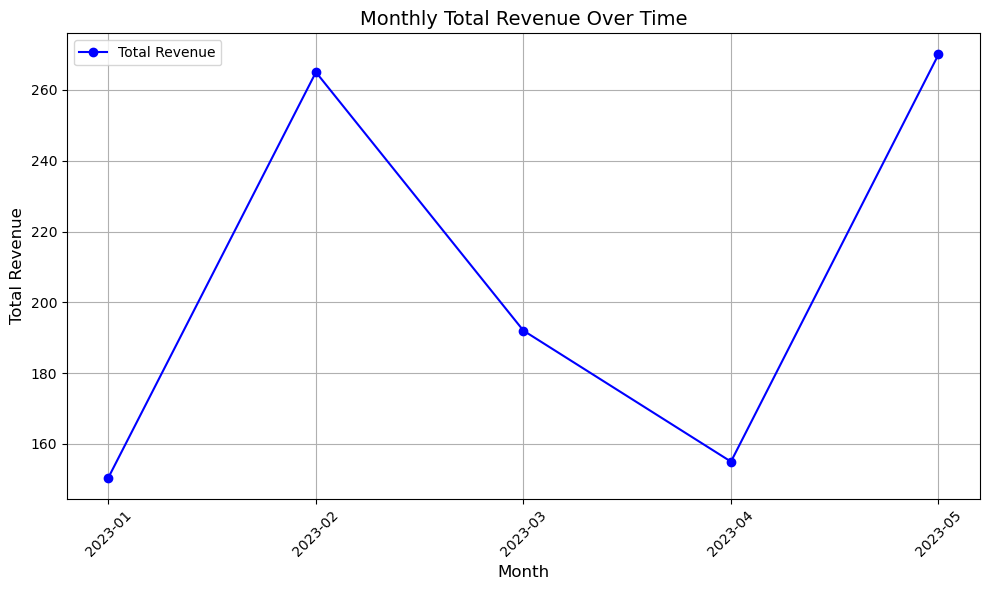

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['Month'].astype(str), monthly_revenue['Revenue'], marker='o', color='b', label='Total Revenue')
plt.title('Monthly Total Revenue Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

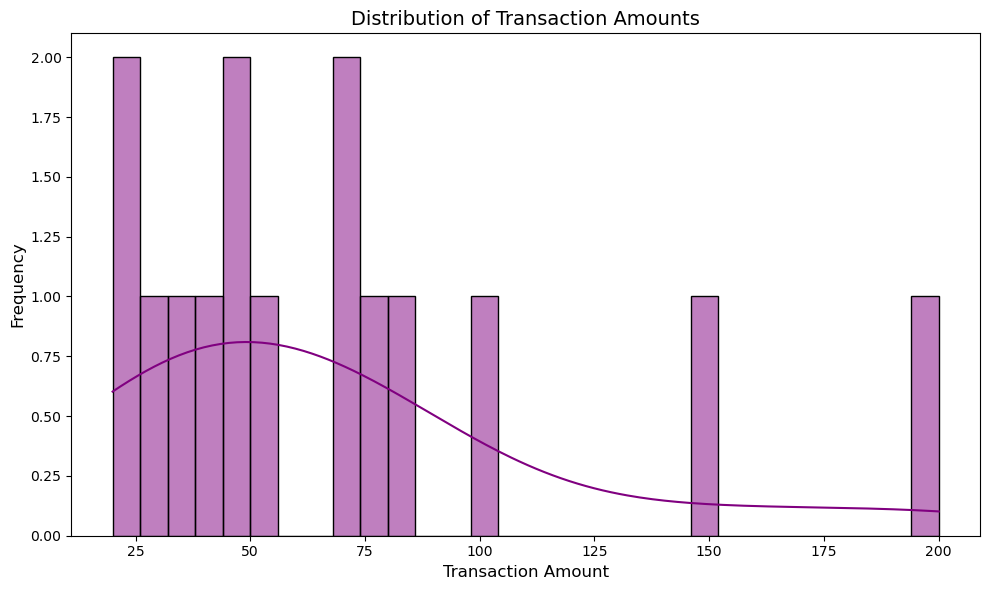

In [25]:
# ! pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

merged_df['TransactionAmount'] = merged_df['Quantity'] * merged_df['Price']



plt.figure(figsize=(10, 6))
sns.histplot(merged_df['TransactionAmount'], kde=True, bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Transaction Amounts', fontsize=14)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

### Question 6: Application of Data Analysis Concepts

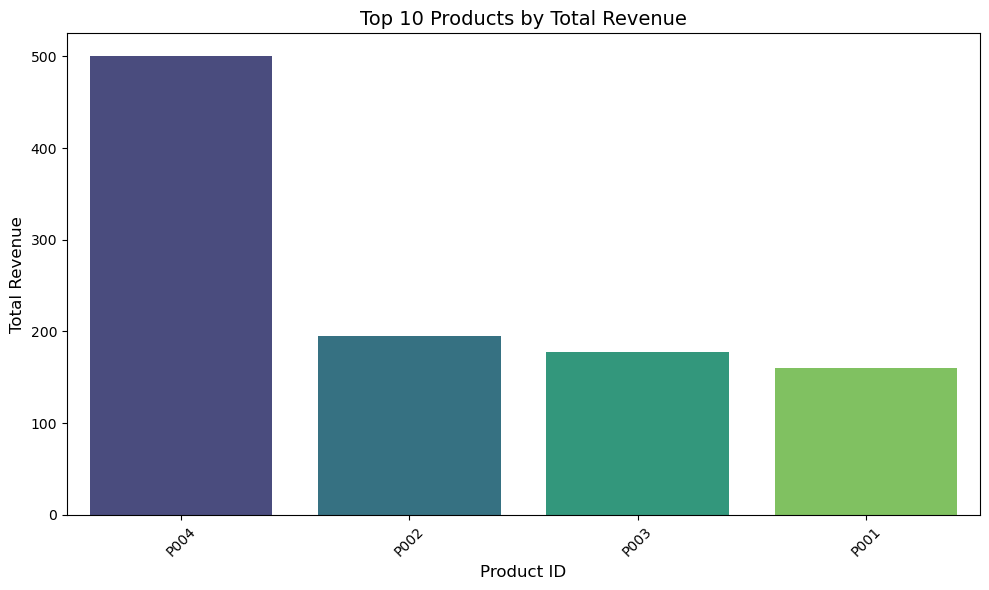

In [26]:
# a) Exploratory Data Analysis (EDA)

product_revenue = transactions.groupby('ProductID').apply(
    lambda x: (x['Quantity'] * x['Price']).sum()).reset_index(name='TotalRevenue')

product_revenue_sorted = product_revenue.sort_values(by='TotalRevenue', ascending=False)



plt.figure(figsize=(10, 6))
sns.barplot(x='ProductID', y='TotalRevenue', data=product_revenue_sorted.head(10), palette='viridis')
plt.title('Top 10 Products by Total Revenue', fontsize=14)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

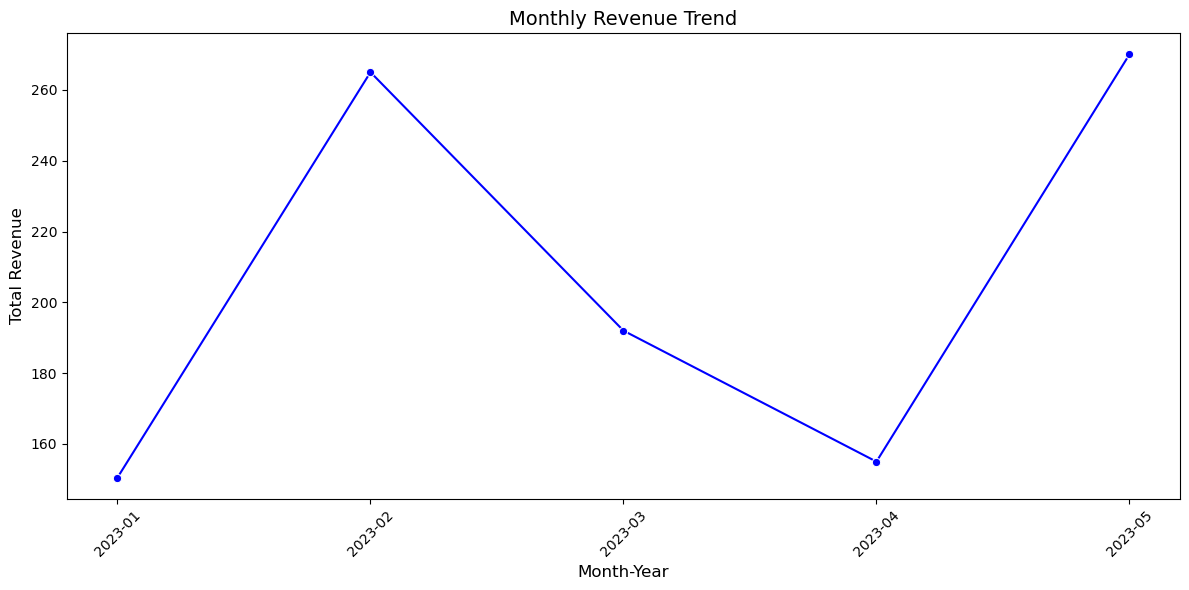

In [27]:


transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['MonthYear'] = transactions['TransactionDate'].dt.to_period('M')
transactions['MonthYear'] = transactions['MonthYear'].astype(str)
transactions['Revenue'] = transactions['Quantity'] * transactions['Price']


monthly_revenue = transactions.groupby('MonthYear')['Revenue'].sum().reset_index(name='TotalRevenue')
monthly_revenue['TotalRevenue'] = pd.to_numeric(monthly_revenue['TotalRevenue'], errors='coerce')


plt.figure(figsize=(12, 6))
sns.lineplot(x='MonthYear', y='TotalRevenue', data=monthly_revenue, marker='o', color='blue')
plt.title('Monthly Revenue Trend', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
# b) Data Preprocessing
transactions['Price'].fillna(transactions['Price'].median(), inplace=True)

print("Missing values in the dataset:")
print(transactions.isnull().sum())

Missing values in the dataset:
TransactionID      0
CustomerID         0
ProductID          0
Quantity           0
Price              0
TransactionDate    0
MonthYear          0
Revenue            0
dtype: int64


In [29]:
# feture engineering

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Year'] = transactions['TransactionDate'].dt.year
transactions['Month'] = transactions['TransactionDate'].dt.month
transactions['DayOfWeek'] = transactions['TransactionDate'].dt.dayofweek  
transactions['Revenue'] = transactions['Quantity'] * transactions['Price']

customer_revenue = transactions.groupby('CustomerID')['Revenue'].sum().reset_index()

transactions = pd.merge(transactions, customer_revenue, on='CustomerID', suffixes=('', '_TotalRevenue'))

In [30]:
# i got problem with prevous file that's why again need to use the modified file to Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_data.csv', index=False)

print("Merged DataFrame has been saved to 'merged_data.csv'.")

Merged DataFrame has been saved to 'merged_data.csv'.


In [31]:
print(merged_df.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'Quantity', 'Price',
       'TransactionDate', 'Name', 'Segment', 'Revenue', 'Month',
       'TransactionAmount'],
      dtype='object')


In [32]:
merged_df.columns = merged_df.columns.str.strip()

In [33]:
print(merged_df.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'Quantity', 'Price',
       'TransactionDate', 'Name', 'Segment', 'Revenue', 'Month',
       'TransactionAmount'],
      dtype='object')


In [34]:
print(merged_df.head())

  TransactionID CustomerID ProductID  Quantity  Price TransactionDate  \
0          T001       C001      P001         2   20.0      2023-01-15   
1          T004       C001      P002         3   15.0      2023-02-01   
2          T009       C001      P003         2   35.5      2023-03-20   
3          T015       C001      P004         3   50.0      2023-05-20   
4          T002       C002      P003         1   35.5      2023-01-16   

          Name    Segment  Revenue    Month  TransactionAmount  
0  Alice Smith   Consumer     40.0  2023-01               40.0  
1  Alice Smith   Consumer     45.0  2023-02               45.0  
2  Alice Smith   Consumer     71.0  2023-03               71.0  
3  Alice Smith   Consumer    150.0  2023-05              150.0  
4  Bob Johnson  Corporate     35.5  2023-01               35.5  


In [35]:

import pandas as pd

merged_df = pd.read_csv('merged_data.csv')
merged_df.columns = merged_df.columns.str.strip()


print("Columns in merged dataframe:", merged_df.columns)

if 'Segment' in merged_df.columns:
    
    merged_df = pd.get_dummies(merged_df, columns=['Segment'], drop_first=True)
    print("Columns after encoding:", merged_df.columns)
else:
    print("Error: 'Segment' column not found in the merged DataFrame.")

Columns in merged dataframe: Index(['TransactionID', 'CustomerID', 'ProductID', 'Quantity', 'Price',
       'TransactionDate', 'Name', 'Segment', 'Revenue', 'Month',
       'TransactionAmount'],
      dtype='object')
Columns after encoding: Index(['TransactionID', 'CustomerID', 'ProductID', 'Quantity', 'Price',
       'TransactionDate', 'Name', 'Revenue', 'Month', 'TransactionAmount',
       'Segment_Corporate', 'Segment_Small Business'],
      dtype='object')


In [36]:
customers = pd.read_csv('I:\\SWPU Research\\Research_Task\\BytesOfIntelligence\\Data-Science-and-Machine-Learning\\redownload-data\\customers.csv')
print(customers.head())

  CustomerID           Name         Segment
0       C001    Alice Smith        Consumer
1       C002    Bob Johnson       Corporate
2       C003    Charlie Lee  Small Business
3       C004   Diana Prince        Consumer
4       C005  Edward Norton       Corporate


In [37]:

merged_df = pd.merge(transactions, customers[['CustomerID', 'Segment']], on='CustomerID', how='inner')
print(merged_df.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'Quantity', 'Price',
       'TransactionDate', 'MonthYear', 'Revenue', 'Year', 'Month', 'DayOfWeek',
       'Revenue_TotalRevenue', 'Segment'],
      dtype='object')


In [38]:

transactions.columns = transactions.columns.str.strip()
customers.columns = customers.columns.str.strip()

In [39]:
merged_df = pd.merge(transactions, customers[['CustomerID', 'Segment']], on='CustomerID', how='inner')

In [40]:
print(merged_df.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'Quantity', 'Price',
       'TransactionDate', 'MonthYear', 'Revenue', 'Year', 'Month', 'DayOfWeek',
       'Revenue_TotalRevenue', 'Segment'],
      dtype='object')


In [41]:
import pandas as pd


transactions = pd.read_csv('transactions.csv')
customers = pd.read_csv('customers.csv')


transactions.columns = transactions.columns.str.strip()
customers.columns = customers.columns.str.strip()


print("Transactions columns:", transactions.columns)
print("Customers columns:", customers.columns)


if 'CustomerID' in transactions.columns and 'Segment' in customers.columns:
    merged_df = pd.merge(transactions, customers[['CustomerID', 'Segment']], on='CustomerID', how='inner')
    print("Merged DataFrame columns:", merged_df.columns)
else:
    print("Error: 'CustomerID' or 'Segment' column not found in the relevant DataFrames.")
print(merged_df.head())


if 'Segment' in merged_df.columns:
    merged_df = pd.get_dummies(merged_df, columns=['Segment'], drop_first=True)
    print("Columns after encoding:", merged_df.columns)
else:
    print("Error: 'Segment' column not found after merge.")

Transactions columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'Quantity', 'Price',
       'TransactionDate'],
      dtype='object')
Customers columns: Index(['CustomerID           Name         Segment'], dtype='object')
Error: 'CustomerID' or 'Segment' column not found in the relevant DataFrames.
  TransactionID CustomerID ProductID  Quantity  Price TransactionDate  \
0          T001       C001      P001         2   20.0      2023-01-15   
1          T004       C001      P002         3   15.0      2023-02-01   
2          T009       C001      P003         2   35.5      2023-03-20   
3          T015       C001      P004         3   50.0      2023-05-20   
4          T002       C002      P003         1   35.5      2023-01-16   

  MonthYear  Revenue  Year  Month  DayOfWeek  Revenue_TotalRevenue    Segment  
0   2023-01     40.0  2023      1          6                 306.0   Consumer  
1   2023-02     45.0  2023      2          2                 306.0   Consumer  
2   2023-03 